In [1]:
import cellhint
import celltypist
import cellxgene_census
census = cellxgene_census.open_soma(census_version = "latest")
import gget
import scanpy as sc

gget.setup("cellxgene")

# Uncomment the following line to see the documentation
help(gget.cellxgene)

Installing cellxgene-census package (requires pip).
cellxgene_census installed succesfully.


Help on function cellxgene in module gget.gget_cellxgene:

cellxgene(species='homo_sapiens', gene=None, ensembl=False, column_names=['dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type'], meta_only=False, tissue=None, cell_type=None, development_stage=None, disease=None, sex=None, is_primary_data=True, dataset_id=None, tissue_general_ontology_term_id=None, tissue_general=None, assay_ontology_term_id=None, assay=None, cell_type_ontology_term_id=None, development_stage_ontology_term_id=None, disease_ontology_term_id=None, donor_id=None, self_reported_ethnicity_ontology_term_id=None, self_reported_ethnicity=None, sex_ontology_term_id=None, suspension_type=None, tissue_ontology_term_id=None, census_version='stable', verbose=True, out=None)
    Query data from CZ CELLxGENE Discover (https://cellxgene.cziscience.com/) using the
    CZ CELLxGENE Discover Census (https://github.com/chanzuckerberg/cellxgene-census).

    NOTE: Querying large datasets requires

In [28]:
'''
Query the cellxgene database for all Mus musculus cells with the following filters:
Filters:
species: Mus musculus
disease: normal
tissue_general: kidney

> Query Time:
'''

adata = gget.cellxgene(
species="mus_musculus",
tissue_general="kidney",
disease="normal",
meta_only=False,
verbose=True,
is_primary_data=True,
out="Mm_gget_kidney.h5ad",
)

Fetching AnnData object from CZ CELLxGENE Discover. This might take a few minutes...
The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
... storing 'feature_type' as categorical


In [22]:
adata = sc.read('/Users/aumchampaneri/PycharmProjects/Biochemistry-BS/Human Kidney Atlas/Mm_gget_kidney.h5ad')

In [23]:
adata

AnnData object with n_obs × n_vars = 186115 × 52483
    obs: 'dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type', 'is_primary_data', 'disease'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs'

In [24]:
import scanpy.external as sce

sc.pp.recipe_zheng17(adata)
sc.pp.pca(adata)

sce.pp.harmony_integrate(adata, "dataset_id")
sc.pp.neighbors(adata, use_rep='X_pca_harmony')
sc.tl.umap(adata)
sc.pl.umap(adata, color="cell_type", legend_loc="right margin")

Processing datasets 98e5ea9f-16d6-47ec-a529-686e76515e39 <=> 48b37086-25f7-4ecd-be66-f5bb378e3aea
Processing datasets 42bb7f78-cef8-4b0d-9bba-50037d64d8c1 <=> 7b6bab5a-f9c4-4a56-9ed4-3b9079b14867
Processing datasets 7b6bab5a-f9c4-4a56-9ed4-3b9079b14867 <=> 98e5ea9f-16d6-47ec-a529-686e76515e39
Processing datasets 7b6bab5a-f9c4-4a56-9ed4-3b9079b14867 <=> 48b37086-25f7-4ecd-be66-f5bb378e3aea
Processing datasets 42bb7f78-cef8-4b0d-9bba-50037d64d8c1 <=> 98e5ea9f-16d6-47ec-a529-686e76515e39


True

In [21]:
adata

AnnData object with n_obs × n_vars = 186115 × 999
    obs: 'dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type', 'is_primary_data', 'disease', 'n_counts_all'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'scan'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_scanorama'
    varm: 'PCs'
    obsp: 'distances', 'connectivities', 'scan_distances', 'scan_connectivities'

In [7]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony')

In [ ]:
sc.tl.umap(adata)

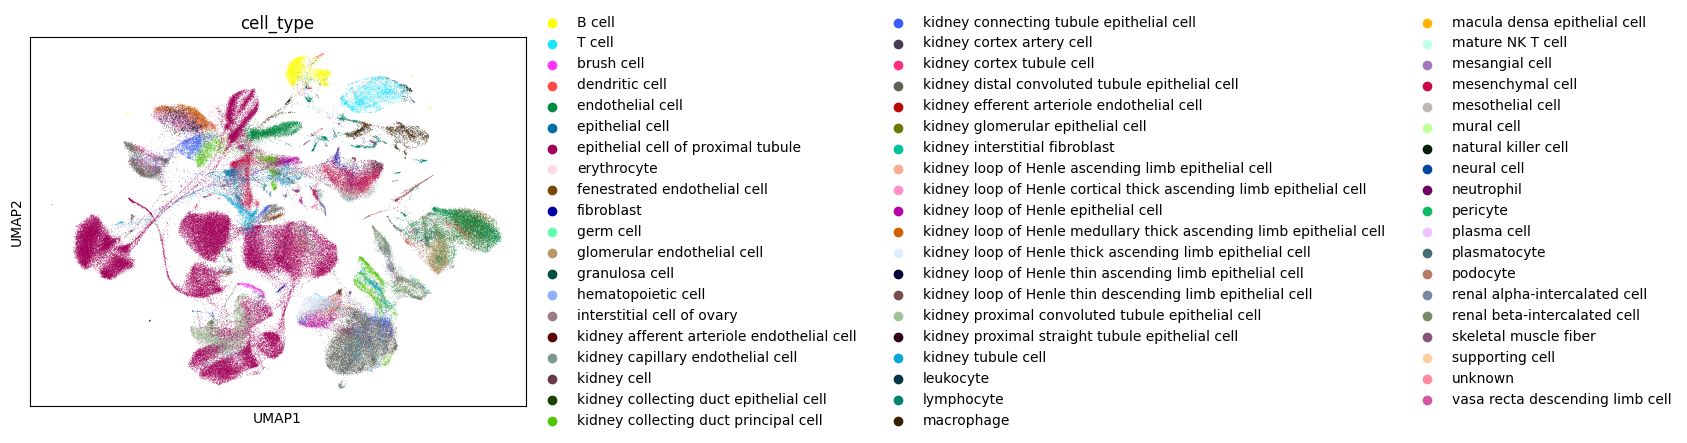

In [16]:
sc.pl.umap(adata, color = "cell_type", legend_loc = "right margin")